In [1]:
import pandas as pd

# Load the weather data
weather_data = pd.read_csv('02-24.csv', parse_dates=['datetime'])

# Display the first few rows of the dataset
print(weather_data.head())


    name    datetime  tempmax  tempmin  temp  feelslikemax  feelslikemin  \
0  Lagos  01/01/2002     28.6     25.6  27.2          33.8          25.6   
1  Lagos  02/01/2002     33.1     26.1  29.0          39.4          26.1   
2  Lagos  03/01/2002     34.1     25.1  29.1          35.2          25.1   
3  Lagos  04/01/2002     33.1     33.1  33.1          39.4          39.4   
4  Lagos  05/01/2002     31.1     25.6  28.3          37.4          25.6   

   feelslike   dew  humidity  ...  severerisk           sunrise  \
0       30.7  25.2      88.7  ...         NaN  01/01/2002 06:57   
1       33.8  25.1      80.5  ...         NaN  02/01/2002 06:57   
2       31.7  23.2      74.6  ...         NaN  03/01/2002 06:58   
3       39.4  24.1      59.3  ...         NaN  04/01/2002 06:58   
4       33.1  25.4      85.0  ...         NaN  05/01/2002 06:58   

             sunset moonphase        conditions  \
0  01/01/2002 18:42      0.57  Partially cloudy   
1  02/01/2002 18:43      0.61  Partial

In [3]:
# Display the first few rows of the weather_dataset
print("Initial weather_dataset:")
print(weather_data.head())

# Step 2: Define the rolling window size (e.g., 3 days)
rolling_window_size = 3

# Calculate the rolling sum of precipitation
weather_data['rolling_precip'] = weather_data['precip'].rolling(window=rolling_window_size, min_periods=1).sum()

# Define a threshold for flood occurrence based on the rolling sum of precipitation
flood_threshold = 30  # Example threshold in mm over the rolling window

# Create a new column 'flood_occurred' based on the threshold
weather_data['flood_occurred'] = weather_data['rolling_precip'].apply(lambda x: 1 if x > flood_threshold else 0)

# Display the first few rows with the new column
print("weather_dataset with flood occurrences:")
print(weather_data.head())

# Step 3: Save the updated weather_dataset to a new CSV file
weather_data.to_csv('flood_prediction.csv', index=False)

print('Updated weather_dataset with flood occurrences saved to flood_prediction.csv')


Initial dataset:
    name    datetime  tempmax  tempmin  temp  feelslikemax  feelslikemin  \
0  Lagos  01/01/2002     28.6     25.6  27.2          33.8          25.6   
1  Lagos  02/01/2002     33.1     26.1  29.0          39.4          26.1   
2  Lagos  03/01/2002     34.1     25.1  29.1          35.2          25.1   
3  Lagos  04/01/2002     33.1     33.1  33.1          39.4          39.4   
4  Lagos  05/01/2002     31.1     25.6  28.3          37.4          25.6   

   feelslike   dew  humidity  ...  severerisk           sunrise  \
0       30.7  25.2      88.7  ...         NaN  01/01/2002 06:57   
1       33.8  25.1      80.5  ...         NaN  02/01/2002 06:57   
2       31.7  23.2      74.6  ...         NaN  03/01/2002 06:58   
3       39.4  24.1      59.3  ...         NaN  04/01/2002 06:58   
4       33.1  25.4      85.0  ...         NaN  05/01/2002 06:58   

             sunset moonphase        conditions  \
0  01/01/2002 18:42      0.57  Partially cloudy   
1  02/01/2002 18:43  

Dataset with flood occurrences:
    name    datetime  tempmax  tempmin  temp  feelslikemax  feelslikemin  \
0  Lagos  01/01/2002     28.6     25.6  27.2          33.8          25.6   
1  Lagos  02/01/2002     33.1     26.1  29.0          39.4          26.1   
2  Lagos  03/01/2002     34.1     25.1  29.1          35.2          25.1   
3  Lagos  04/01/2002     33.1     33.1  33.1          39.4          39.4   
4  Lagos  05/01/2002     31.1     25.6  28.3          37.4          25.6   

   feelslike   dew  humidity  ...            sunset  moonphase  \
0       30.7  25.2      88.7  ...  01/01/2002 18:42       0.57   
1       33.8  25.1      80.5  ...  02/01/2002 18:43       0.61   
2       31.7  23.2      74.6  ...  03/01/2002 18:43       0.64   
3       39.4  24.1      59.3  ...  04/01/2002 18:44       0.68   
4       33.1  25.4      85.0  ...  05/01/2002 18:44       0.71   

         conditions                        description               icon  \
0  Partially cloudy         Clearing 

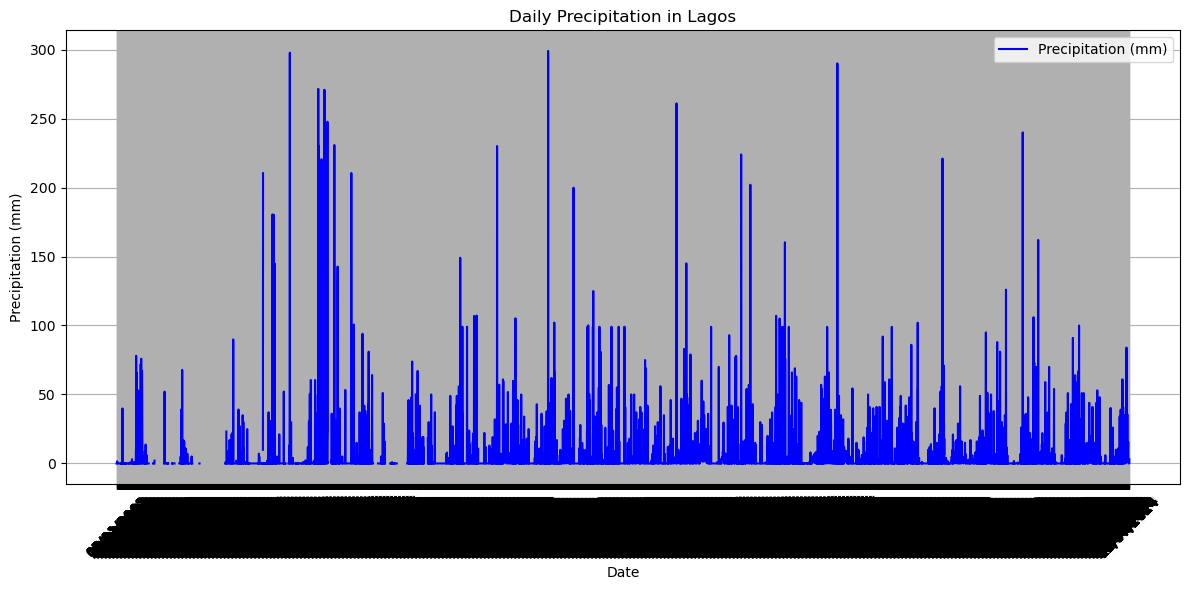

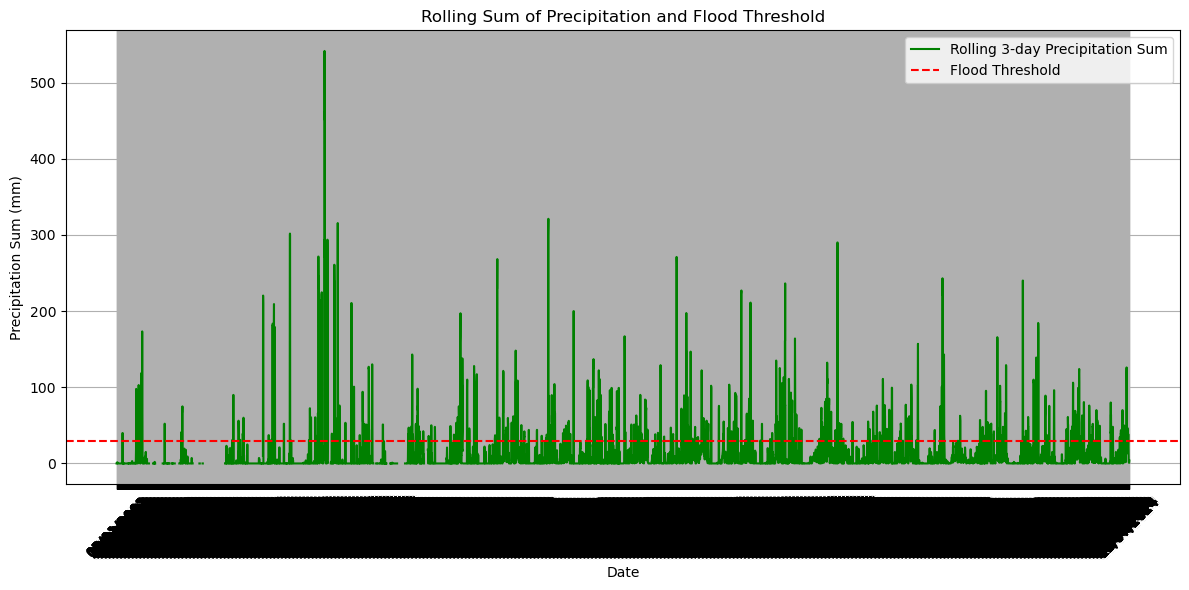

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the existing weather weather_dataset
weather_data = pd.read_csv('Flood_prediction.csv', parse_dates=['datetime'])


# Display the first few rows with the new columns
print("weather_dataset with flood occurrences:")
print(weather_data.head())


# Example 1: Time series plot of precipitation
plt.figure(figsize=(12, 6))
plt.plot(weather_data['datetime'], weather_data['precip'], label='Precipitation (mm)', color='b')
plt.title('Daily Precipitation in Lagos')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Time_series_plot_of_precipitation.png')

print("Chart saved to Time_series_plot_of_precipitation.png")

# Example 2: Plot showing rolling sum of precipitation and flood threshold
plt.figure(figsize=(12, 6))
plt.plot(weather_data['datetime'], weather_data['rolling_precip'], label=f'Rolling {rolling_window_size}-day Precipitation Sum', color='g')
plt.axhline(y=flood_threshold, color='r', linestyle='--', label='Flood Threshold')
plt.fill_between(weather_data['datetime'], weather_data['rolling_precip'], flood_threshold, where=(weather_data['rolling_precip'] > flood_threshold), interpolate=True, color='red', alpha=0.3)
plt.title('Rolling Sum of Precipitation and Flood Threshold')
plt.xlabel('Date')
plt.ylabel('Precipitation Sum (mm)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('sum_of_precipitation_and_flood_threshold.png')

print("Chart saved to sum_of_precipitation_and_flood_threshold.png")


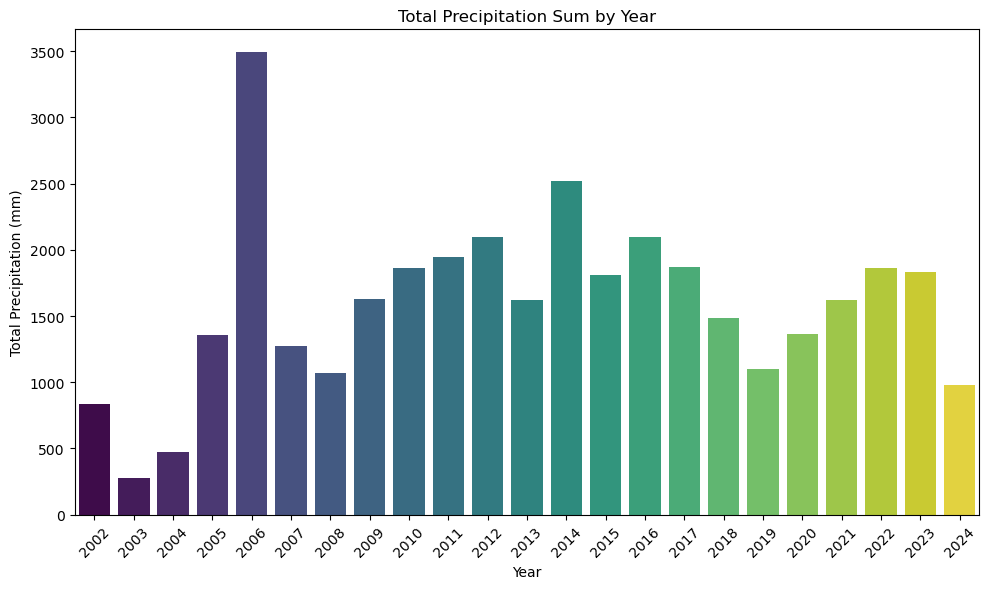

Chart saved to Precipitation_by_month.png


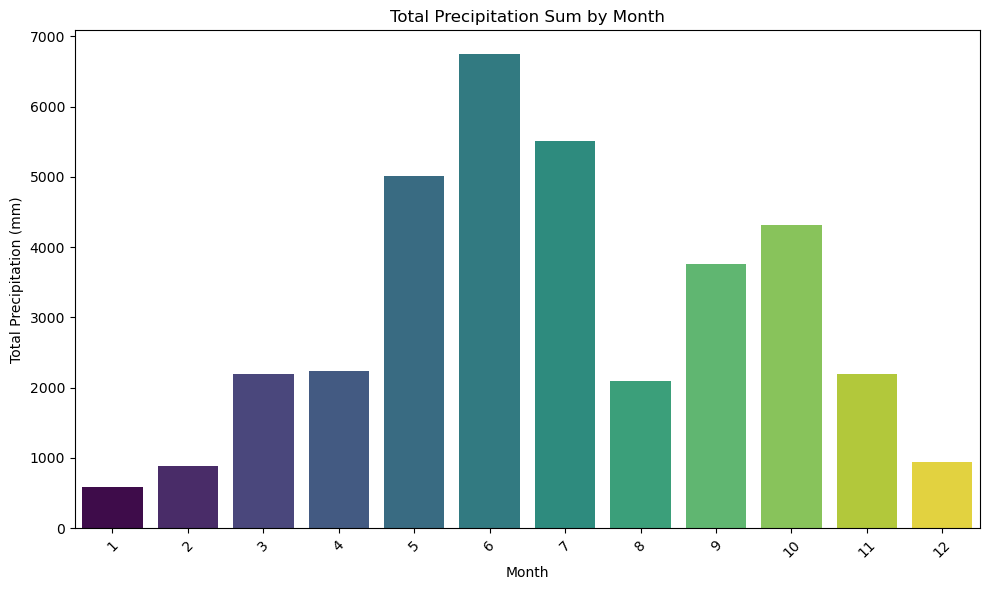

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the existing weather weather_dataset
weather_data = pd.read_csv('Flood_prediction.csv')

# Step 2: Correctly parse the datetime column
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'], format='%d/%m/%Y')

# Step 5: Visualizations
# Example 1: Total precipitation sum by year
yearly_precipitation = weather_data.groupby(weather_data['datetime'].dt.year)['precip'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='datetime', y='precip', weather_data=yearly_precipitation, palette='viridis', hue='datetime', legend=False)
plt.title('Total Precipitation Sum by Year')
plt.xlabel('Year')
plt.ylabel('Total Precipitation (mm)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Example 2: Total precipitation sum by month 
# Ensure all months (1 through 12) are represented in the weather_dataset
weather_data['Month'] = weather_data['datetime'].dt.month
monthly_precipitation = weather_data.groupby('Month')['precip'].sum().reset_index()

# Define the order of months explicitly
month_order = range(1, 13)

plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='precip', weather_data=monthly_precipitation, palette='viridis', hue='Month', order=month_order, legend=False)
plt.title('Total Precipitation Sum by Month')
plt.xlabel('Month')
plt.ylabel('Total Precipitation (mm)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Precipitation_by_month.png')

print("Chart saved to Precipitation_by_month.png")


Chart saved to DailyPrecipitation_over_time.png


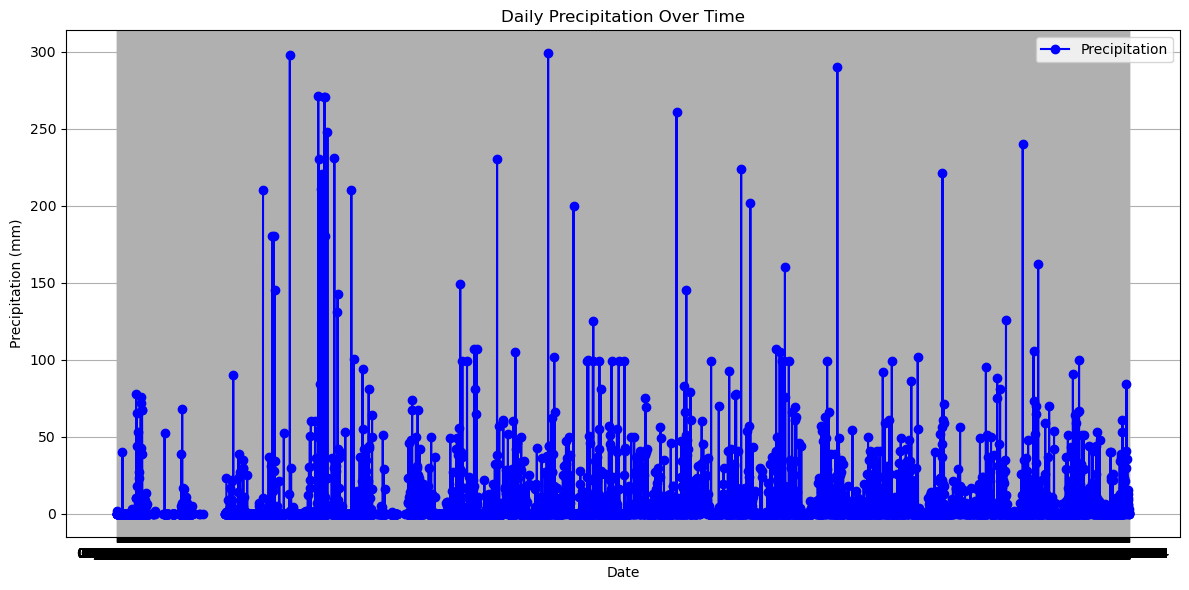

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the existing weather weather_dataset
weather_data = pd.read_csv('Flood_prediction.csv', parse_dates=['datetime'])

# Step 2: Plotting daily precipitation
plt.figure(figsize=(12, 6))
plt.plot(weather_data['datetime'], weather_data['precip'], marker='o', linestyle='-', color='b', label='Precipitation')
plt.title('Daily Precipitation Over Time')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('DailyPrecipitation_over_time.png')

print("Chart saved to DailyPrecipitation_over_time.png")


Initial dataset:
          Name            datetime        Date      Time  temp  feelslike  \
0  LAGOS STATE 2024-07-02 00:00:00  02/07/2024  00:00:00  27.1       29.6   
1  LAGOS STATE 2024-07-02 01:00:00  02/07/2024  01:00:00  27.1       29.4   
2  LAGOS STATE 2024-07-02 02:00:00  02/07/2024  02:00:00  27.2       29.6   
3  LAGOS STATE 2024-07-02 03:00:00  02/07/2024  03:00:00  26.9       29.2   
4  LAGOS STATE 2024-07-02 04:00:00  02/07/2024  04:00:00  26.8       29.0   

    dew  humidity  precip  precipprob  ... sealevelpressure  cloudcover  \
0  22.7     76.90     0.2       100.0  ...           1013.0        99.0   
1  22.4     75.51     0.0         0.0  ...           1013.0       100.0   
2  22.4     75.07     0.0         0.0  ...           1012.0       100.0   
3  22.6     77.34     0.0         0.0  ...           1012.0       100.0   
4  22.6     77.80     0.0         0.0  ...           1012.0       100.0   

   visibility  solarradiation  solarenergy  uvindex  severerisk  \
0 

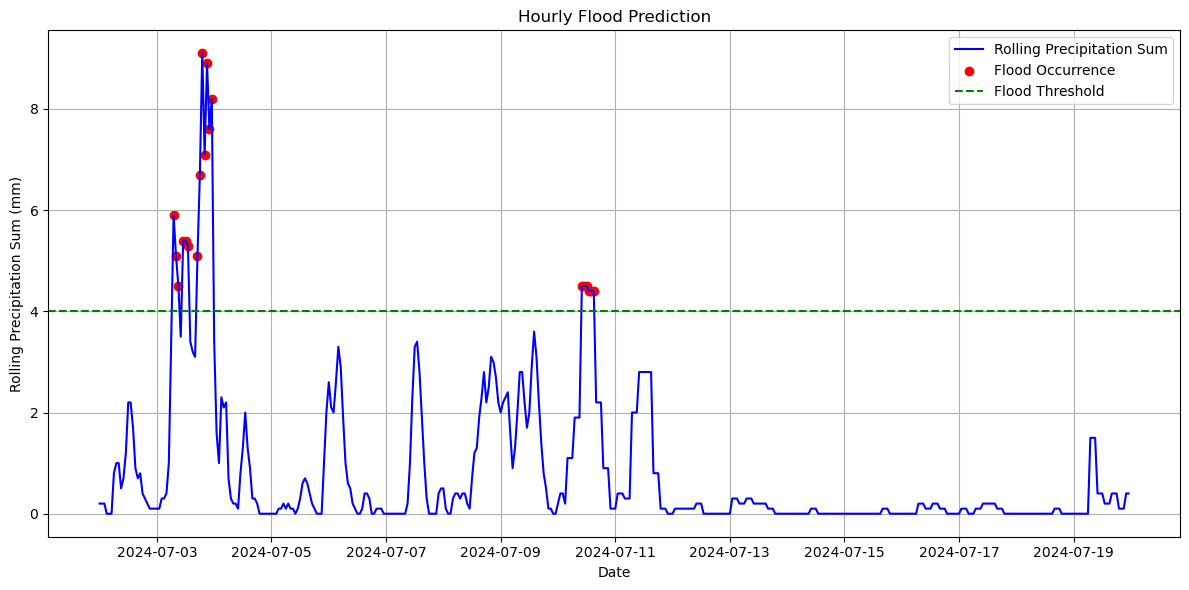

In [37]:
import pandas as pd
import matplotlib.pyplot as plt


# Step 1: Load the existing hourly weather weather_dataset
weather_data_hour = pd.read_csv('Lagos_hour.csv', parse_dates=['datetime'])

# Display the first few rows of the weather_dataset for verification
print("Initial weather_dataset:")
print(weather_data_hour.head())

# Step 2: Define the rolling window size (e.g., 3 hours)
rolling_window_size = 3  # Adjust according to the weather_dataset characteristics

# Calculate the rolling sum of precipitation
weather_data_hour['rolling_precip'] = weather_data_hour['precip'].rolling(window=rolling_window_size, min_periods=1).sum()

# Step 3: Define a threshold for flood occurrence based on the rolling sum of precipitation
flood_threshold = 4  # Adjust according to hourly weather_data characteristics and flood criteria

# Create a new column 'flood_occurred' based on the threshold
weather_data_hour['flood_occurred'] = weather_data_hour['rolling_precip'].apply(lambda x: 1 if x > flood_threshold else 0)

# Display the first few rows with the new columns
print("weather_dataset with flood occurrences:")
print(weather_data_hour.head())

# Step 4: Save the updated weather_dataset to a new CSV file 
weather_data_hour.to_csv('flood_prediction_hourly.csv', index=False)
print('Updated weather_dataset with flood occurrences saved to flood_prediction_hourly.csv')

# Step 5: Visualize flood occurrences over time 
plt.figure(figsize=(12, 6))
plt.plot(weather_data_hour['datetime'], weather_data_hour['rolling_precip'], linestyle='-', color='b', label='Rolling Precipitation Sum')
plt.scatter(weather_data_hour['datetime'][weather_data_hour['flood_occurred'] == 1], 
            weather_data_hour['rolling_precip'][weather_data_hour['flood_occurred'] == 1], 
            color='r', label='Flood Occurrence')
plt.axhline(y=flood_threshold, color='g', linestyle='--', label='Flood Threshold')
plt.title('Hourly Flood Prediction')
plt.xlabel('Date')
plt.ylabel('Rolling Precipitation Sum (mm)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Hourly_Flood_Prediction.png')

print("Chart saved to Hourly_Flood_Prediction.png")


C:\Users\Otuene Hephzibah\AppData\Local\Temp\ipykernel_18056\4279235310.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  idf_data = pd.concat([idf_data, new_row], ignore_index=True)


Chart saved to IDF_curve.png


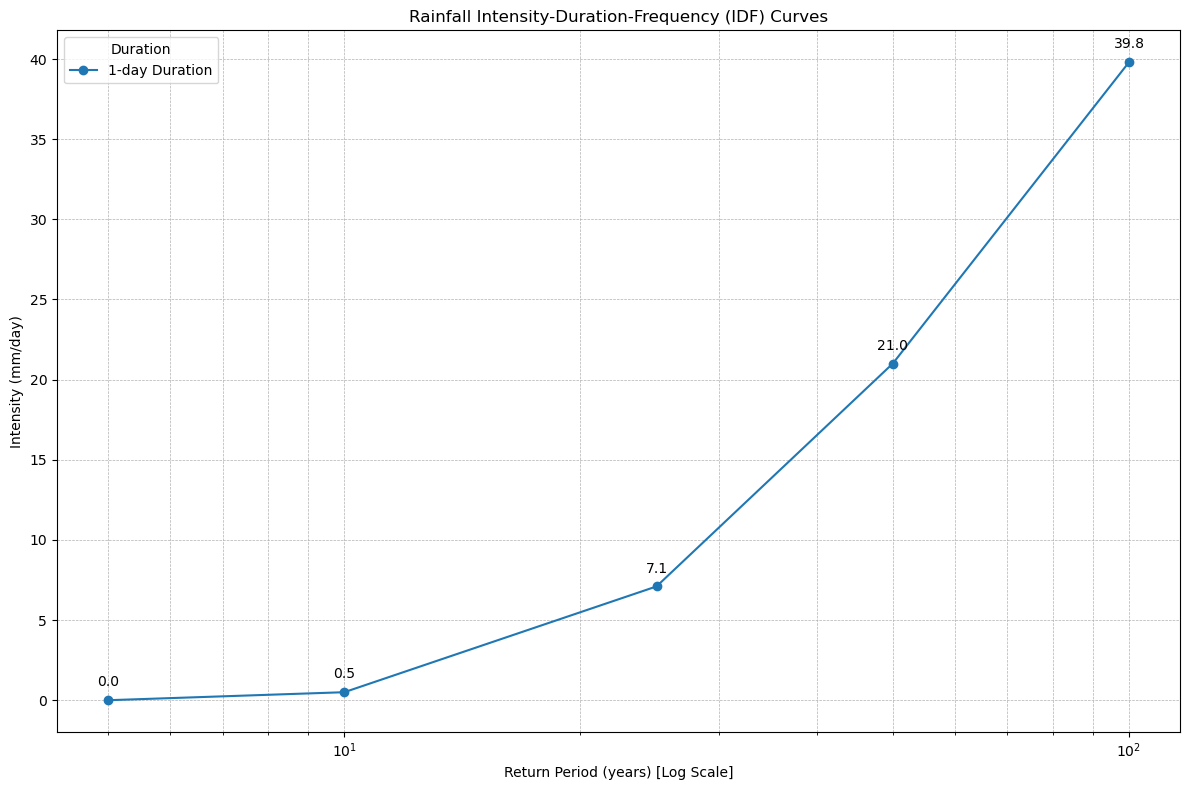

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the existing daily rainfall weather_dataset
weather_data = pd.read_csv('Flood_prediction.csv', parse_dates=['datetime'])

# Step 2: Calculate rainfall intensity (mm/day)
weather_data['intensity'] = weather_data['precip'] # Assuming precip is daily total

# Define return periods (in years)
return_periods = [1, 2, 5, 10, 25, 50, 100]

# Calculate the rank for each day's intensity
weather_data = weather_data.sort_values(by='intensity', ascending=False)
weather_data['rank'] = np.arange(1, len(weather_data) + 1)

# Calculate the return period for each rank
weather_data['return_period'] = (len(weather_data) + 1) / weather_data['rank'] * 3  # Adjust for 3 years of weather_data

# Filter the weather_data for plotting
idf_weather_data = pd.weather_dataFrame(columns=['duration', 'return_period', 'intensity'])

for rp in return_periods:
    max_intensity = weather_data[weather_data['return_period'] <= rp]['intensity'].max()
    new_row = pd.weather_dataFrame({'duration': [1], 'return_period': [rp], 'intensity': [max_intensity]})
    if not new_row.empty and not new_row.isna().all(axis=None):  # Ensure new_row is valid
        idf_weather_data = pd.concat([idf_weather_data, new_row], ignore_index=True)

# Plot IDF Curves
plt.figure(figsize=(12, 8))

plt.plot(idf_weather_data['return_period'], idf_weather_data['intensity'], marker='o', label='1-day Duration')

# Enhancing the graph with more detailed labels
plt.title('Rainfall Intensity-Duration-Frequency (IDF) Curves')
plt.xlabel('Return Period (years) [Log Scale]')
plt.ylabel('Intensity (mm/day)')
plt.xscale('log')  # Log scale for return period
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title='Duration')
plt.tight_layout()

# Annotate points for clarity
for i, row in idf_weather_data.iterrows():
    plt.annotate(f'{row["intensity"]:.1f}', (row['return_period'], row['intensity']),
                 textcoords="offset points", xytext=(0,10), ha='center')

plt.savefig('IDF_curve.png')

print("Chart saved to IDF_curve.png")



Dataset:
    name    datetime    Month  Year  tempmax  tempmin  temp  feelslikemax  \
0  Lagos  01/01/2002  January  2002     28.6     25.6  27.2          33.8   
1  Lagos  02/01/2002  January  2002     33.1     26.1  29.0          39.4   
2  Lagos  03/01/2002  January  2002     34.1     25.1  29.1          35.2   
3  Lagos  04/01/2002  January  2002     33.1     33.1  33.1          39.4   
4  Lagos  05/01/2002  January  2002     31.1     25.6  28.3          37.4   

   feelslikemin  feelslike  ...  sunset time  moonphase        conditions  \
0          25.6       30.7  ...     18:42:00       0.57  Partially cloudy   
1          26.1       33.8  ...     18:43:00       0.61  Partially cloudy   
2          25.1       31.7  ...     18:43:00       0.64  Partially cloudy   
3          39.4       39.4  ...     18:44:00       0.68  Partially cloudy   
4          25.6       33.1  ...     18:44:00       0.71  Partially cloudy   

                         description               icon     stati

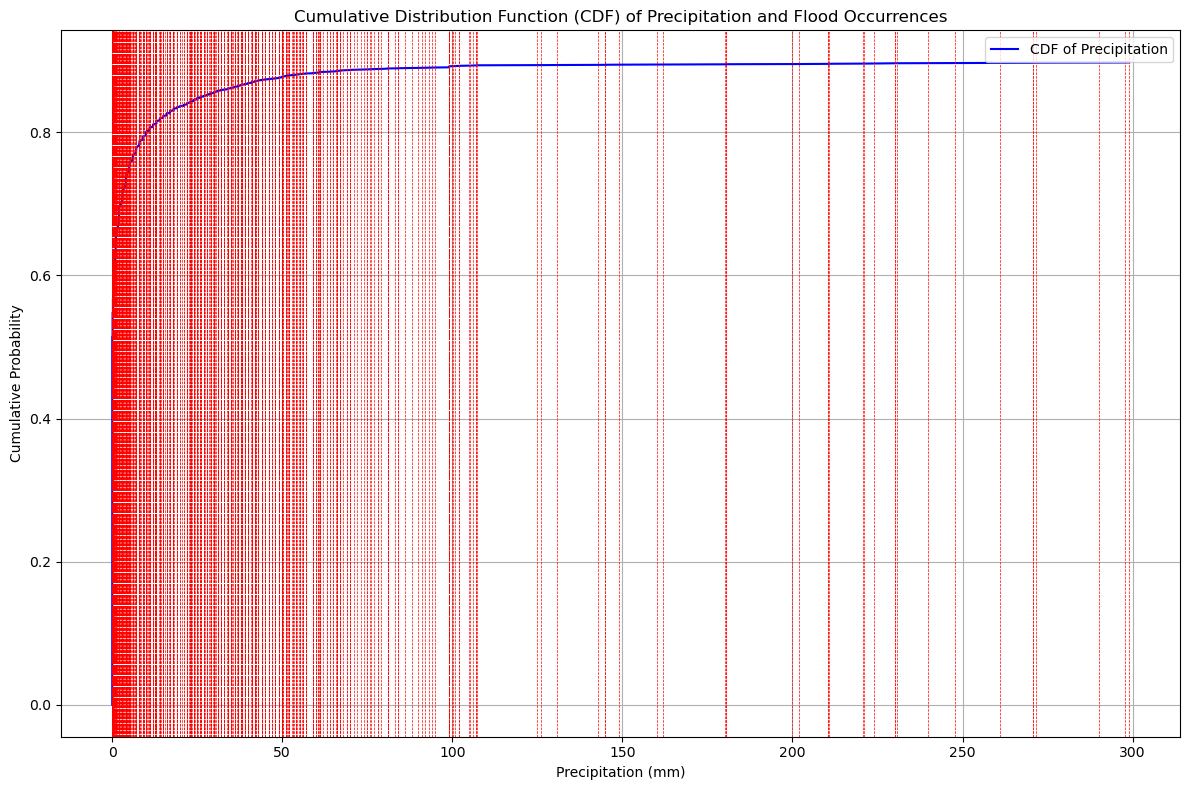

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the existing weather_dataset
weather_data = pd.read_csv('Flood_prediction.csv', parse_dates=['datetime'])

# Display the first few rows of the weather_dataset for verification
print("weather_dataset:")
print(weather_data.head())

# Step 2: Calculate the CDF for precipitation
sorted_precip = np.sort(weather_data['precip'])
cdf = np.arange(1, len(sorted_precip) + 1) / len(sorted_precip)

# Step 3: Plot the CDF for precipitation
plt.figure(figsize=(12, 8))
plt.plot(sorted_precip, cdf, label='CDF of Precipitation', color='b')

# Highlight precipitation events where flood occurred
flood_precip = weather_data[weather_data['flood_occurred'] == 1]['precip']
for fp in flood_precip:
    plt.axvline(x=fp, color='r', linestyle='--', linewidth=0.5)

# Add details to the plot
plt.title('Cumulative Distribution Function (CDF) of Precipitation and Flood Occurrences')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show plot
plt.savefig('CDF_curve.png')

print("Chart saved to CDF_curve.png")


Dataset:
    name    datetime    Month  Year  tempmax  tempmin  temp  feelslikemax  \
0  Lagos  01/01/2002  January  2002     28.6     25.6  27.2          33.8   
1  Lagos  02/01/2002  January  2002     33.1     26.1  29.0          39.4   
2  Lagos  03/01/2002  January  2002     34.1     25.1  29.1          35.2   
3  Lagos  04/01/2002  January  2002     33.1     33.1  33.1          39.4   
4  Lagos  05/01/2002  January  2002     31.1     25.6  28.3          37.4   

   feelslikemin  feelslike  ...  sunset time  moonphase        conditions  \
0          25.6       30.7  ...     18:42:00       0.57  Partially cloudy   
1          26.1       33.8  ...     18:43:00       0.61  Partially cloudy   
2          25.1       31.7  ...     18:43:00       0.64  Partially cloudy   
3          39.4       39.4  ...     18:44:00       0.68  Partially cloudy   
4          25.6       33.1  ...     18:44:00       0.71  Partially cloudy   

                         description               icon     stati

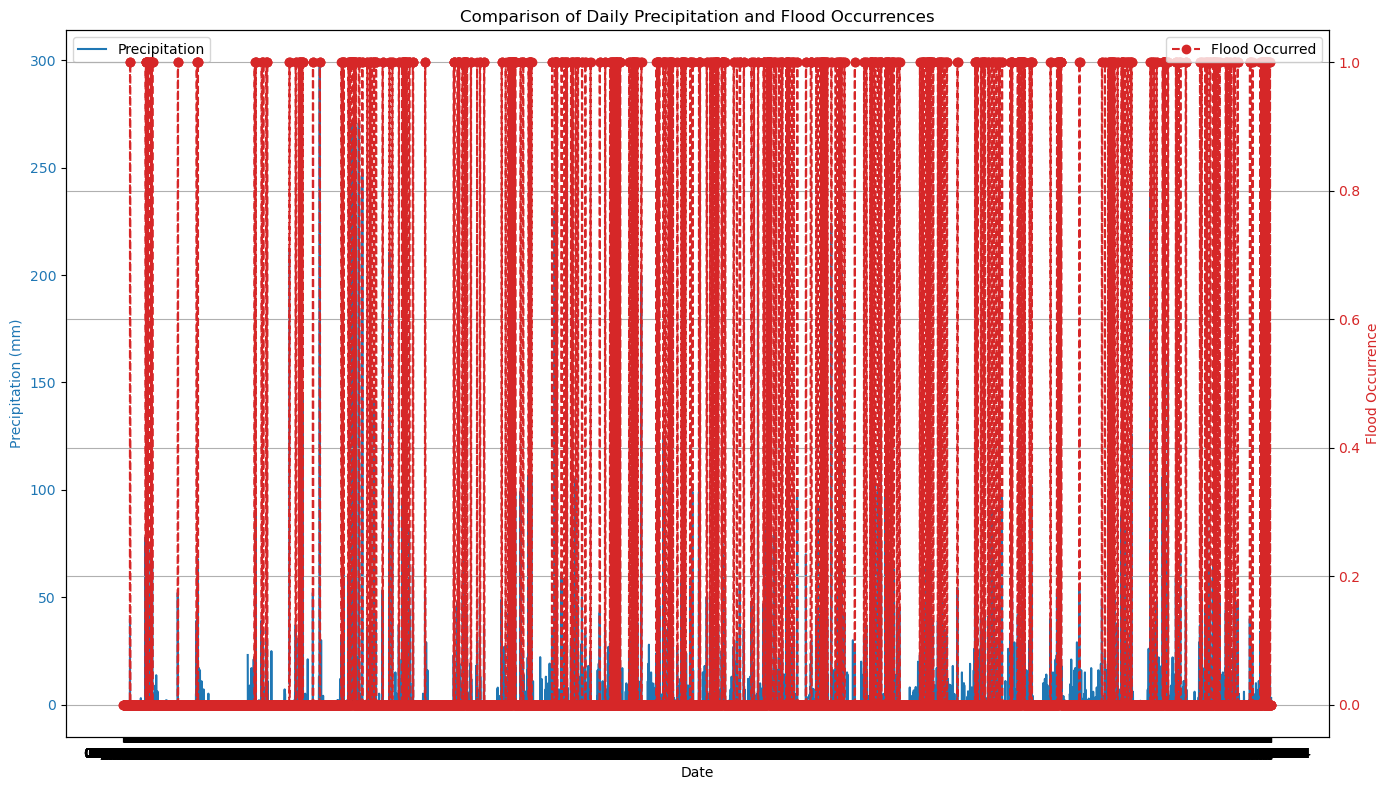

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the existing weather_dataset
weather_data = pd.read_csv('Flood_prediction.csv', parse_dates=['datetime'])

# Display the first few rows of the weather_dataset for verification
print("weather_dataset:")
print(weather_data.head())

# Step 2: Create a dual-axis plot to compare precipitation and flood occurrences
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot daily precipitation on the primary y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Precipitation (mm)', color='tab:blue')
ax1.plot(weather_data['datetime'], weather_data['precip'], color='tab:blue', label='Precipitation')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc='upper left')

# Create a secondary y-axis to plot flood occurrences
ax2 = ax1.twinx()
ax2.set_ylabel('Flood Occurrence', color='tab:red')
ax2.plot(weather_data['datetime'], weather_data['flood_occurred'], color='tab:red', label='Flood Occurred', linestyle='--', marker='o')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.legend(loc='upper right')

# Add titles and grid
plt.title('Comparison of Daily Precipitation and Flood Occurrences')
plt.grid(True)
plt.tight_layout()

# Show plot
plt.savefig('Daily_p_vs_f.png')

print("Chart saved to Daily_p_vs_f.png")


Chart saved to Yearly_p_vs_f.png


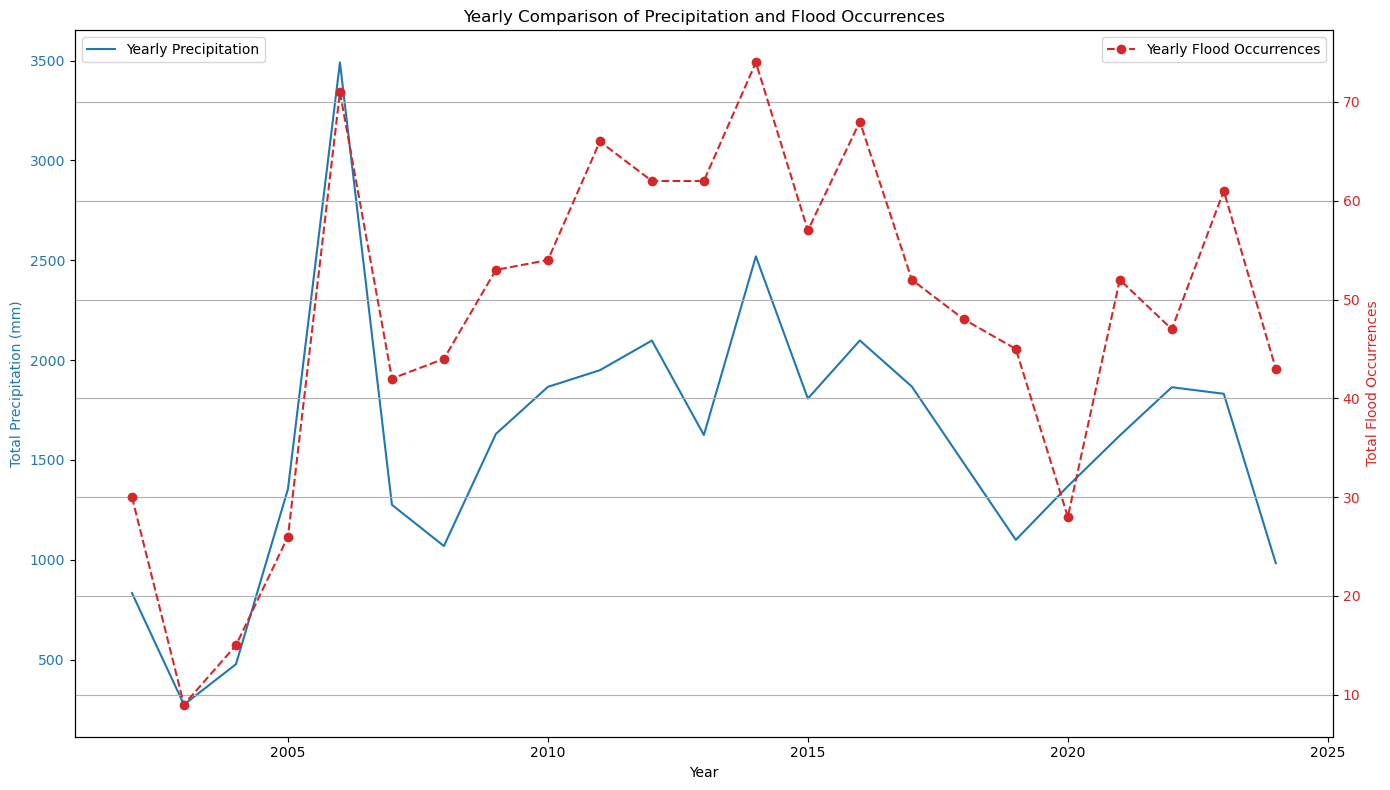

In [46]:
# Step 1: Aggregate weather_data by year
yearly_weather_data = weather_data.groupby('Year').agg({
    'precip': 'sum',
    'flood_occurred': 'sum'
}).reset_index()

# Step 2: Plot yearly total precipitation and flood occurrences
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot yearly precipitation on the primary y-axis
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Precipitation (mm)', color='tab:blue')
ax1.plot(yearly_weather_data['Year'], yearly_weather_data['precip'], color='tab:blue', label='Yearly Precipitation')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc='upper left')

# Create a secondary y-axis to plot yearly flood occurrences
ax2 = ax1.twinx()
ax2.set_ylabel('Total Flood Occurrences', color='tab:red')
ax2.plot(yearly_weather_data['Year'], yearly_weather_data['flood_occurred'], color='tab:red', label='Yearly Flood Occurrences', linestyle='--', marker='o')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.legend(loc='upper right')

# Add titles and grid
plt.title('Yearly Comparison of Precipitation and Flood Occurrences')
plt.grid(True)
plt.tight_layout()

# Show plot
plt.savefig('Yearly_p_vs_f.png')

print("Chart saved to Yearly_p_vs_f.png")


Chart saved to Monthly_p_vs_f.png


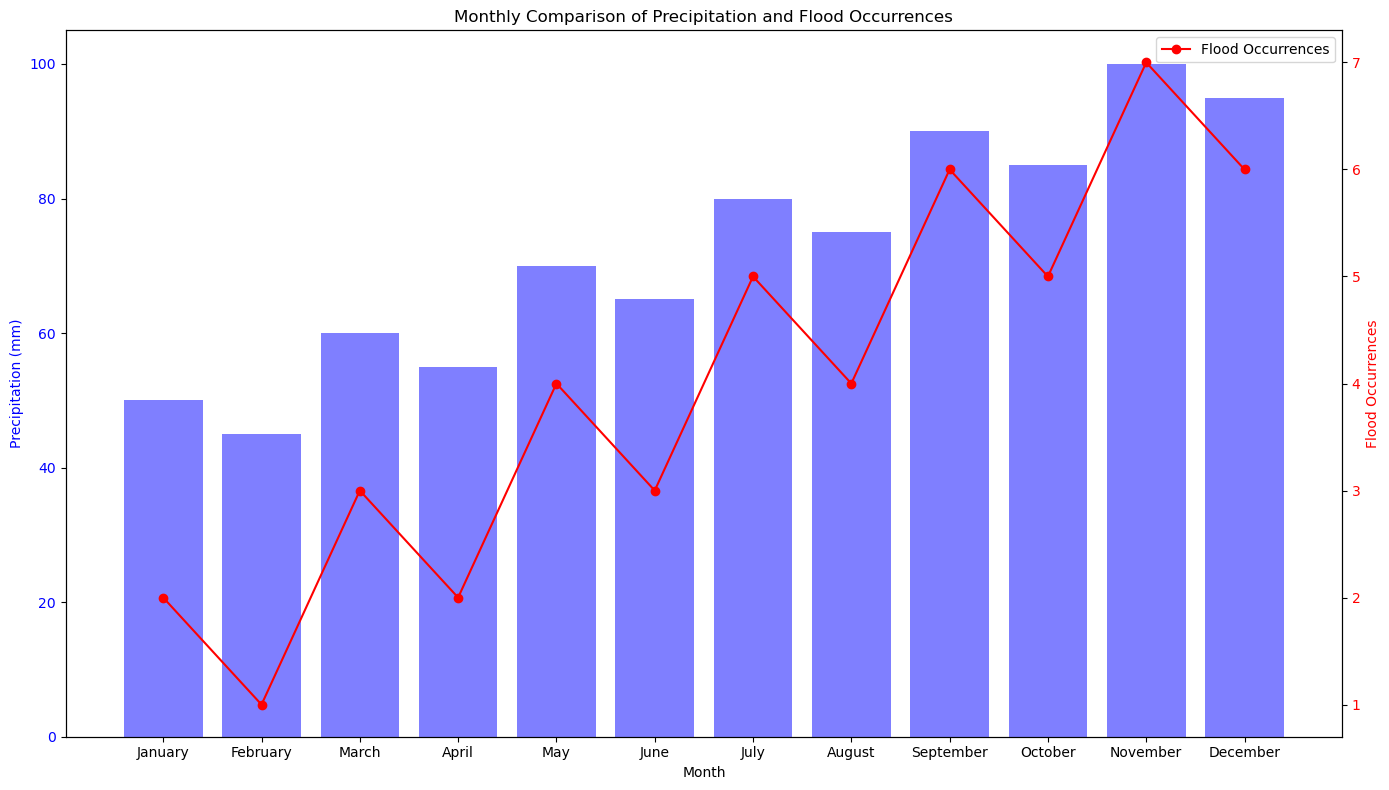

In [49]:
import matplotlib.pyplot as plt

# Example aggregated weather_data
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
precipitation = [50, 45, 60, 55, 70, 65, 80, 75, 90, 85, 100, 95]  # Example values for precipitation (mm)
flood_occurrences = [2, 1, 3, 2, 4, 3, 5, 4, 6, 5, 7, 6]  # Example values for flood occurrences

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plotting precipitation
ax1.bar(months, precipitation, color='b', alpha=0.5, label='Precipitation (mm)')
ax1.set_xlabel('Month')
ax1.set_ylabel('Precipitation (mm)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Creating a secondary y-axis for flood occurrences
ax2 = ax1.twinx()
ax2.plot(months, flood_occurrences, color='r', marker='o', label='Flood Occurrences')
ax2.set_ylabel('Flood Occurrences', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Title and legend
plt.title('Monthly Comparison of Precipitation and Flood Occurrences')
fig.tight_layout()
plt.legend()

plt.savefig('Monthly_p_vs_f.png')

print("Chart saved to Monthly_p_vs_f.png")


In [11]:
import pandas as pd

weather_data = pd.read_csv('Flood_prediction.csv', parse_dates=['datetime'])


summary_stats = weather_data.groupby('severerisk').agg({
    'precip': ['mean', 'median', 'max', 'min'],
    'precipprob': ['mean', 'median', 'max', 'min'],
    'precipcover': ['mean', 'median', 'max', 'min'],
    'sealevelpressure': ['mean', 'median', 'max', 'min']
}).reset_index()

# Print the summary statistics
print(summary_stats)

# Save the summary statistics to a CSV file
summary_stats.to_csv('severerisk.csv', index=False)

print('Updated weather_dataset with flood occurrences saved to severerisk.csv')

  severerisk    precip                     precipprob                        \
                  mean median    max  min        mean  median    max    min   
0       10.0  6.115200    0.1  162.0  0.0   51.471200   69.35  100.0    0.0   
1       30.0  5.289423    0.1   73.0  0.0   51.240705  100.00  100.0    0.0   
2       38.0  0.000000    0.0    0.0  0.0    0.000000    0.00    0.0    0.0   
3       60.0  3.538931    0.0   91.0  0.0   44.274809    0.00  100.0    0.0   
4       75.0  6.180435    0.0  240.0  0.0   40.217391    0.00  100.0    0.0   
5      100.0  0.220000    0.2    0.3  0.1  100.000000  100.00  100.0  100.0   

  precipcover                     sealevelpressure                          
         mean median    max   min             mean  median     max     min  
0    6.300520   4.17  79.17  0.00      1013.370800  1013.4  1016.6  1009.0  
1    5.382596   4.17  70.83  0.00      1012.283654  1012.3  1015.8  1008.5  
2    0.000000   0.00   0.00  0.00      1009.900000  1009.9 

Chart saved to severerisk_levels.png


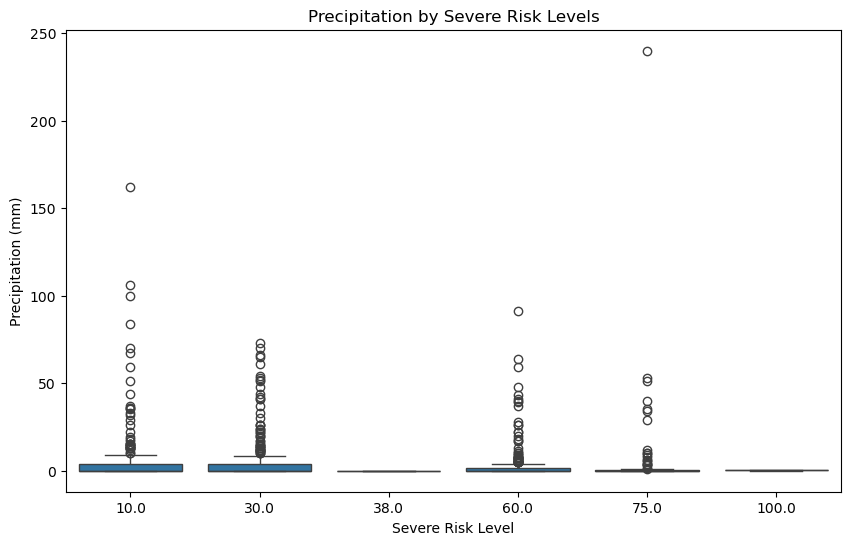

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='severerisk', y='precip', data=weather_data)
plt.title('Precipitation by Severe Risk Levels')
plt.xlabel('Severe Risk Level')
plt.ylabel('Precipitation (mm)')
plt.savefig('severerisk_levels.)

print("Chart saved to severerisk_levels.png")

Chart saved to probsevererisk.png


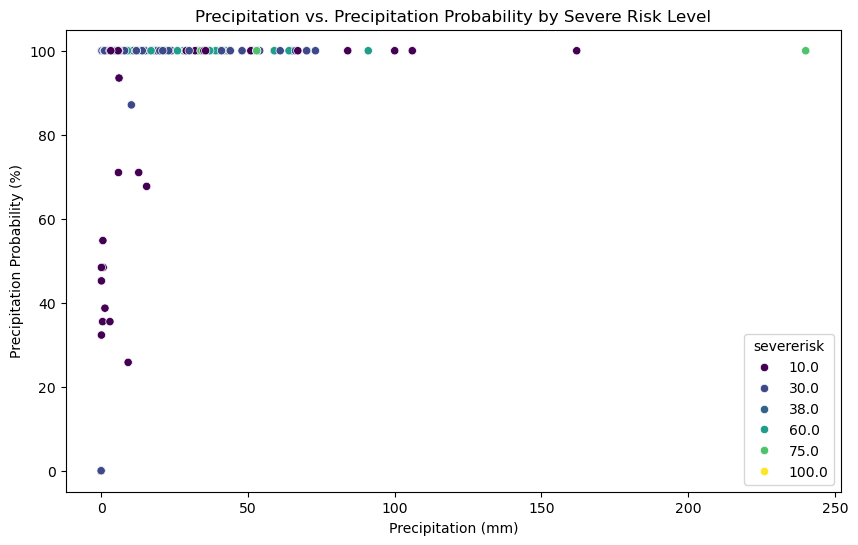

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='precip', y='precipprob', hue='severerisk', data=weather_data, palette='viridis')
plt.title('Precipitation vs. Precipitation Probability by Severe Risk Level')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Precipitation Probability (%)')
plt.savefig('probsevererisk.png')

print("Chart saved to probsevererisk.png")

Chart saved to precovsevererisk.png


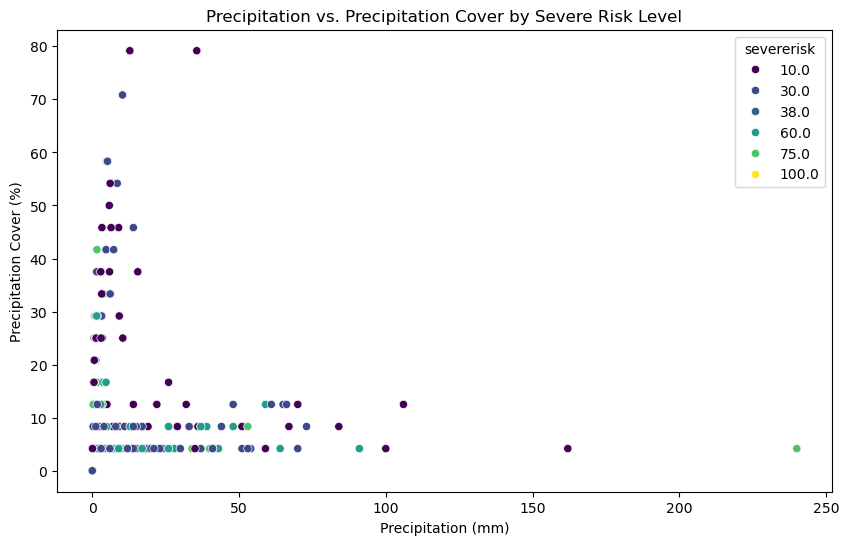

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='precip', y='precipcover', hue='severerisk', data=weather_data, palette='viridis')
plt.title('Precipitation vs. Precipitation Cover by Severe Risk Level')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Precipitation Cover (%)')
plt.savefig('precovsevererisk.png')

print("Chart saved to precovsevererisk.png")


Chart saved to sealevelpressure.png


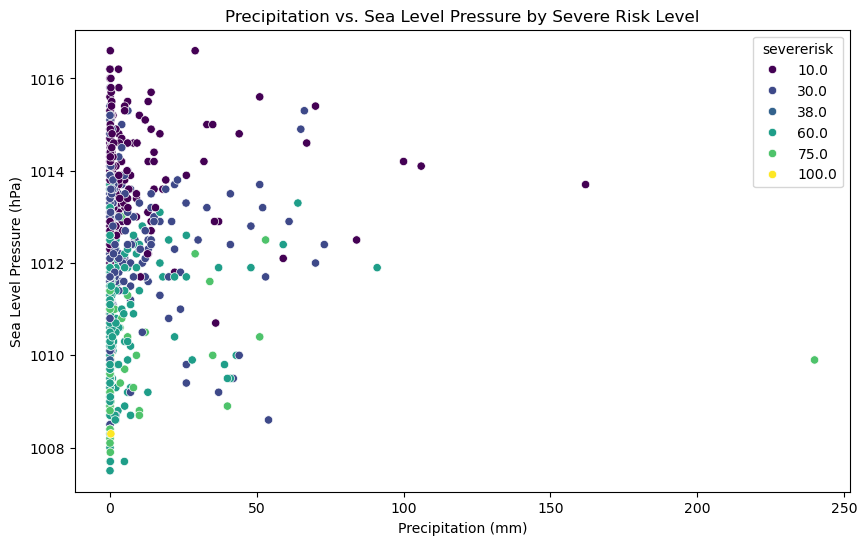

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='precip', y='sealevelpressure', hue='severerisk', data=weather_data, palette='viridis')
plt.title('Precipitation vs. Sea Level Pressure by Severe Risk Level')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Sea Level Pressure (hPa)')
plt.savefig('sealevelpressure.png')

print("Chart saved to sealevelpressure.png")

Chart saved to cumpreflod.png


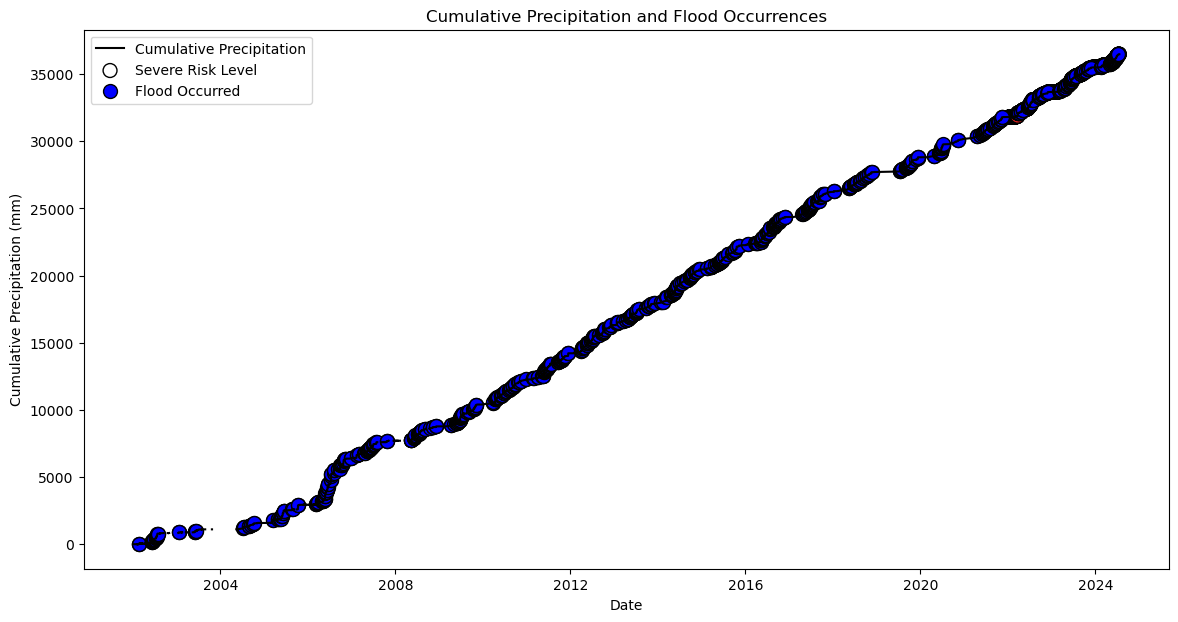

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure datetime column is in datetime format with dayfirst
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'], dayfirst=True)

# Calculate cumulative precipitation
weather_data['cumulative_precip'] = weather_data['precip'].cumsum()

# Plot cumulative precipitation and highlight high severerisk and flood occurrences
plt.figure(figsize=(14, 7))
plt.plot(weather_data['datetime'], weather_data['cumulative_precip'], label='Cumulative Precipitation', color='black')
plt.scatter(weather_data['datetime'], weather_data['cumulative_precip'], c=weather_data['severerisk'], cmap='Reds', s=100, label='Severe Risk Level', edgecolor='black')
plt.scatter(weather_data[weather_data['flood_occurred'] == 1]['datetime'], weather_data[weather_data['flood_occurred'] == 1]['cumulative_precip'], color='blue', s=100, label='Flood Occurred', edgecolor='black')
plt.xlabel('Date')
plt.ylabel('Cumulative Precipitation (mm)')
plt.title('Cumulative Precipitation and Flood Occurrences')
plt.legend()
plt.savefig('cumpreflod.png')

print("Chart saved to cumpreflod.png")


In [37]:
correlation_matrix = weather_data[['precip', 'precipprob', 'precipcover', 'sealevelpressure', 'severerisk']].corr()
print(correlation_matrix)

# Print the correlation matrix
print(correlation_matrix)

# Save the correlation matrix to a CSV file
correlation_matrix.to_csv('correlation_matrix.csv')



                    precip  precipprob  precipcover  sealevelpressure  \
precip            1.000000    0.317131     0.075849          0.077406   
precipprob        0.317131    1.000000     0.466778          0.166405   
precipcover       0.075849    0.466778     1.000000          0.000331   
sealevelpressure  0.077406    0.166405     0.000331          1.000000   
severerisk       -0.043941   -0.060974    -0.155281         -0.643155   

                  severerisk  
precip             -0.043941  
precipprob         -0.060974  
precipcover        -0.155281  
sealevelpressure   -0.643155  
severerisk          1.000000  
                    precip  precipprob  precipcover  sealevelpressure  \
precip            1.000000    0.317131     0.075849          0.077406   
precipprob        0.317131    1.000000     0.466778          0.166405   
precipcover       0.075849    0.466778     1.000000          0.000331   
sealevelpressure  0.077406    0.166405     0.000331          1.000000   
severerisk

In [43]:
import statsmodels.api as sm

print (weather_data.head())



weather_data.to_csv('cumprecip.csv', index=False)

print('Updated weather_dataset with flood occurrences saved to cumprecip.csv')


    name   datetime    Month  Year  tempmax  tempmin  temp  feelslikemax  \
0  Lagos 2002-01-01  January  2002     28.6     25.6  27.2          33.8   
1  Lagos 2002-01-02  January  2002     33.1     26.1  29.0          39.4   
2  Lagos 2002-01-03  January  2002     34.1     25.1  29.1          35.2   
3  Lagos 2002-01-04  January  2002     33.1     33.1  33.1          39.4   
4  Lagos 2002-01-05  January  2002     31.1     25.6  28.3          37.4   

   feelslikemin  feelslike  ...  moonphase        conditions  \
0          25.6       30.7  ...       0.57  Partially cloudy   
1          26.1       33.8  ...       0.61  Partially cloudy   
2          25.1       31.7  ...       0.64  Partially cloudy   
3          39.4       39.4  ...       0.68  Partially cloudy   
4          25.6       33.1  ...       0.71  Partially cloudy   

                         description               icon     stations  \
0         Clearing in the afternoon.  partly-cloudy-day  65201099999   
1  Partly clou

In [51]:
import statsmodels.api as sm
import numpy as np

# Independent variables
X = weather_data[['precip', 'precipprob', 'precipcover', 'sealevelpressure']]
# Dependent variable
y = weather_data['severerisk']

# Check for missing or infinite values and handle them
X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna()
y = y.loc[X.index]  # Ensure y is aligned with X after dropping rows

# Add a constant to the independent variables matrix
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

with open('regression_results.txt', 'w') as file:
    file.write(model.summary().as_text())

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Assuming 'weather_data' is your DataFrame containing the specified columns
weather_data = pd.read_csv('flood_prediction.csv')

# Select relevant features (adjust as needed)
features = ['tempmax', 'tempmin', 'temp', 'feelslike', 'humidity', 'precip', 'windspeed', 'sealevelpressure']

X = weather_data[features]
y = weather_data['flood_occurred']

# Handle missing values
imputer = SimpleImputer(strategy='mean')  # Impute missing values with mean
X = imputer.fit_transform(X)

# Split data into training and testing sets (you can adjust test_size and random_state as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (optional, but often recommended for linear models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the linear regression model
model = LinearRegression()

# Perform cross-validation to evaluate model performance
predicted = cross_val_predict(model, X_train, y_train, cv=5)

# Calculate RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_train, predicted, squared=False)

# Calculate R-squared
r2 = r2_score(y_train, predicted)

print(f'Cross-validated RMSE: {rmse}')
print(f'Cross-validated R-squared: {r2}')

# Save results to a text file
output_file = 'model_performance.txt'
with open(output_file, 'w') as f:
    f.write(f'Cross-validated RMSE: {rmse}\n')
    f.write(f'Cross-validated R-squared: {r2}\n')

print(f'Results saved to {output_file}')

Cross-validated RMSE: 0.3044991822485497
Cross-validated R-squared: 0.2210897073326048
Results saved to model_performance.txt


C:\Users\Otuene Hephzibah\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load and preprocess your data
weather_data = pd.read_csv('flood_prediction.csv')

# Define features and target variable
features = ['tempmax', 'tempmin', 'temp', 'feelslike', 'humidity', 'precip', 'windspeed', 'sealevelpressure']
X = weather_data[features]
y = weather_data['flood_occurred']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train a Random Forest model
rf_model = RandomForestRegressor(random_state=42)
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=params, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Evaluate best model from GridSearchCV
best_model = grid_search.best_estimator_
predicted = cross_val_predict(best_model, X_train, y_train, cv=5)

# Calculate RMSE and R-squared
rmse = mean_squared_error(y_train, predicted, squared=False)
r2 = r2_score(y_train, predicted)

print(f'Cross-validated RMSE: {rmse}')
print(f'Cross-validated R-squared: {r2}')

# Evaluate on test set
test_predictions = best_model.predict(X_test)
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)
test_r2 = r2_score(y_test, test_predictions)

print(f'Test RMSE: {test_rmse}')
print(f'Test R-squared: {test_r2}')

# Save results to a text file
output_file = 'model_perform.txt'
with open(output_file, 'w') as f:
    f.write(f'Cross-validated RMSE: {rmse}\n')
    f.write(f'Cross-validated R-squared: {r2}\n')
    f.write(f'Test RMSE: {test_rmse}\n')
    f.write(f'Test R-squared: {test_r2}\n')

print(f'Results saved to {output_file}')

Cross-validated RMSE: 0.2847353186669021
Cross-validated R-squared: 0.31892041538398386
Test RMSE: 0.2752863046853805
Test R-squared: 0.3548258729802011
Results saved to model_perform.txt


C:\Users\Otuene Hephzibah\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Otuene Hephzibah\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
